<h1>Predicting The Stock Market With Machine Learning and Python</h1>

<div> <img src="sp500.png" width="600" /> </div>

The S&P 500 is a stock market index that tracks the stocks of 500 of the largest publicly traded companies in the United States.
The companies included in the index are selected based on their market capitalization, which is the total value of their outstanding shares.
The S&P 500 is considered a benchmark for the overall performance of the U.S. stock market.
It includes companies across all 11 sectors of the economy, as defined by the GICS classification system.
The index is weighted according to the size of the companies in the index, with larger companies having more influence on the index's performance.
The S&P 500 was introduced in 1957 by Standard & Poor's, and since then, it has seen an annualized average return of about 10% .
The S&P 500 is owned by S&P Dow Jones Indices, which is a joint venture between S&P Global, CME Group, and News Corp.

Now, we want to try predict the stock market, using historical data.

In [38]:
#this package calls the yahoo finance API to download daily stock index prices
import yfinance as yf

In [39]:
#downloading price history for a single symbol 
#The ticker symbol for the S&P 500 index is ^GSPC
sp500 = yf.Ticker("^GSPC")

In [40]:
#downloading all data from the begining when GSPC was created
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,0.0,0.0
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,0.0,0.0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,0.0,0.0


In [41]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-05-19 00:00:00-04:00', '2023-05-22 00:00:00-04:00',
               '2023-05-23 00:00:00-04:00', '2023-05-24 00:00:00-04:00',
               '2023-05-25 00:00:00-04:00', '2023-05-26 00:00:00-04:00',
               '2023-05-30 00:00:00-04:00', '2023-05-31 00:00:00-04:00',
               '2023-06-01 00:00:00-04:00', '2023-06-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23970, freq=None)

<h1> Cleaning And Visualization </h1>

<Axes: xlabel='Date'>

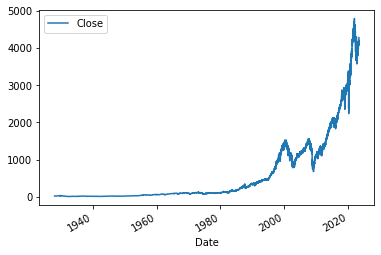

In [42]:
#ploting the closing price against the index
sp500.plot.line(y="Close", use_index=True)

In [43]:
#removing unneccessary columns
del sp500["Dividends"]
del sp500["Stock Splits"]

<h1> Setting up the Target for Machine Learning </h1>

In [44]:
#taking the Close column and shifting all the prices back 1 day
#based on Tomorrow's price we can set up our target
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020


<h3>The Target is what we try to predict with machine learning. </h3>
<h3>Is tomorrow's price greater than today's price?</h3>

In [45]:
#using astype so the output will be an integer instead of True or False for ML
#1 = True , 0 = False
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1


In [46]:
#removing all data that came before 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,4156.160156,4212.870117,4156.160156,4205.450195,3715460000,4205.520020,1
2023-05-30 00:00:00-04:00,4226.709961,4231.100098,4192.180176,4205.520020,4228510000,4179.830078,0
2023-05-31 00:00:00-04:00,4190.740234,4195.439941,4166.149902,4179.830078,5980670000,4221.020020,1


<h1> Training an initial machine learning model </h1>

<h3>Why using RandomForestClassifier:</h3>
Work by training a bunch of individual decision trees with randomized parametrs, 
Then averaging the results from those decision trees.
So that's why randomforest are resistants to overfitting.
They can overfit but it's harder for them than other algorithms,
They run reletively quickly,
They can pickup nonlinear tendencies in the data,
In stock price prediction most of the times there's no linear relationship between the open price and the target.
If the open price is higher, that doesn't mean the target will also be higher!
If we could find a linear relationship, then we could make a lot of money!

In [47]:
#initializing our model:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

n_estimators = number of individual decision tree we want to train. The higher the better accuracy. </br>
min_split = helps us protect overfitting. </br>
Decision trees have a tendency to overfit, if they build the tree too deeply.
The higher we set min_split, the less accurate the model will be but the less it will overfit. Random forest has some randomization built in, so setting a random state means that if we run the same model twice, the random numbers that are generated will be in a predictable sequence each time using this random seed of one, which helps in updating or improving model. We can make sure it's actually the model or something you did that improved error versus just something random.

<h1> Spliting the data into Train and Test set </h1>

We can't use cross validation for time series data, because this way we will be using future data to predict the past!
Which is impossible in the real world. It will result in something called "leakage" = data leaking (leaking information into the model).
We want the modelt to actually learn how to predict the stock price, not just randomly happen to have some knowledge about the future!

In [48]:
#we're gonna put all of the rows except the last 100 rows into the training set
train = sp500.iloc[:-100]

#we're gonna put the last 100 rows into the test set
test = sp500.iloc[-100:]

#the columns that we need to predict the target
predictors = ["Close", "Volume", "Open", "High", "Low"]

#fitting the model
#it's gonna train the model using predictors columns in order to predict the target
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

<h1> Measuring the accuracy of the model </h1>

In [49]:
#we're choosing precision_score as error metric to use what percentage of the time when we said the market would go up did it actually go up
from sklearn.metrics import precision_score

#generating predictions using our model with the predict method
#we pass in our test set with the predictors
preds = model.predict(test[predictors])

In [50]:
import pandas as pd
#1 = True (the price will go up) , 0 = False (the price will go down)
preds = pd.Series(preds, index=test.index)
preds

Date
2023-01-10 00:00:00-05:00    0
2023-01-11 00:00:00-05:00    0
2023-01-12 00:00:00-05:00    0
2023-01-13 00:00:00-05:00    0
2023-01-17 00:00:00-05:00    0
                            ..
2023-05-26 00:00:00-04:00    1
2023-05-30 00:00:00-04:00    0
2023-05-31 00:00:00-04:00    1
2023-06-01 00:00:00-04:00    1
2023-06-02 00:00:00-04:00    1
Length: 100, dtype: int64

In [51]:
#calculating the percision score using the actual Target and the predicted target
precision_score(test["Target"], preds)

0.6875

So when we said the stock price would go up, it only went up 68% of the time.

Ploting our prediction by combining our actual values with our predicted values:

<Axes: xlabel='Date'>

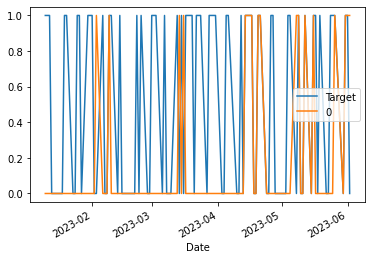

In [52]:
#using pandas' concat function to do that
#concatenating the test target which is our actual value and our predicted values
#we pass axis = 1 , which means each of these inputs as a column in our dataset

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

#orange line is our predictions
#blue line is what actually happend